In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

In [50]:
df = pd.read_csv("Final_Dataset.csv")
df = df.drop(['Unnamed: 0'], axis=1)

# BASIC ANALYSIS

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727119 entries, 0 to 727118
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Text          727119 non-null  object
 1   IsHatespeech  727119 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ MB


Dataset Information:

Function: info()

Purpose: Provides a concise summary of the DataFrame including the index dtype, column dtypes, non-null values, and memory usage.

In [52]:
df.head()

,Text,IsHatespeech
0,denial of normal the con be asked to comment o...,1
1,just by being able to tweet this insufferable ...,1
2,that is retarded you too cute to be single tha...,1
3,thought of a real badass mongol style declarat...,1
4,afro american basho,1


First Few Rows of the Dataset:

Function: head()

Purpose: Displays the first few rows of the dataset.

In [53]:
df.tail()

,Text,IsHatespeech
727114,I remember that they sent in the national defe...,0
727115,Stats don`t represent the problem. Race baitin...,1
727116,The quote from the mother... Wow that hit hard...,0
727117,this video is so racist,0
727118,"God, the narrator has such an annoying lisp.",0


Last Few Rows of the Dataset:

Function: tail()
    
Purpose: Displays the last few rows of the dataset.


In [54]:
# check for missing values
print(df.isnull().sum())

Text            0
IsHatespeech    0
dtype: int64


Sum of Missing Values:

Function: isnull().sum()

Purpose: Computes the sum of missing values for each column

In [55]:
df.columns


Index(['Text', 'IsHatespeech'], dtype='object')

Columns in the Dataset:

Function: .columns
    
Purpose: Lists all the column names in the dataset.

In [56]:

print(df.duplicated().sum())
df = df.drop_duplicates()


25050


Checking for Duplicates:

Function: duplicated().sum()
Purpose: Counts the number of duplicate rows in the dataset.
    
Function: drop_duplicated()
Purpose: Droping those duplicate rows.

***********************************************************************************
#Visual representation of the number of text rows having Hate-Speech and the ones Not having Hate-Speech#

1    359235
0    342834
Name: IsHatespeech, dtype: int64


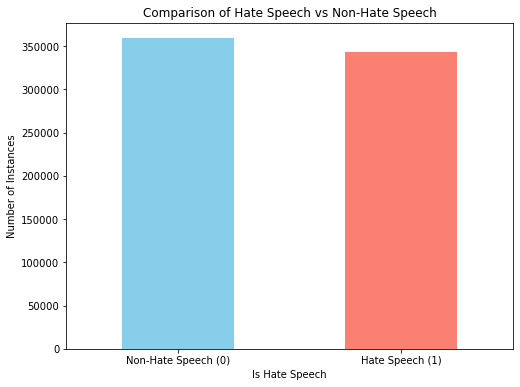

In [57]:

class_counts = df["IsHatespeech"].value_counts()
print(class_counts)
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Comparison of Hate Speech vs Non-Hate Speech')
plt.xlabel('Is Hate Speech')
plt.ylabel('Number of Instances')
plt.xticks(ticks=[0, 1], labels=['Non-Hate Speech (0)', 'Hate Speech (1)'], rotation=0)
plt.show()

# DATA CLEANING

#### Lowercasing: Convert all text to lowercase or uppercase to ensure consistency in text comparison. Python’s .lower()

In [58]:
df['Text'] = df['Text'].str.lower()


#### Removing Punctuation and Numbers from the text

In [59]:
import string
def remove_noise(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ''.join([i for i in text if not i.isdigit()])
    return text

df['Text'] = df['Text'].apply(remove_noise)



#### Tokenization: Tokenize the text data into words or subword units (tokens). This step is often done during data preprocessing but is fundamental to feature engineering.

In [60]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)

df['Text'] = df['Text'].astype(str)

df['tokens'] = df['Text'].apply(tokenize_text)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Text,IsHatespeech,tokens
0,denial of normal the con be asked to comment o...,1,"[denial, of, normal, the, con, be, asked, to, ..."
1,just by being able to tweet this insufferable ...,1,"[just, by, being, able, to, tweet, this, insuf..."
2,that is retarded you too cute to be single tha...,1,"[that, is, retarded, you, too, cute, to, be, s..."
3,thought of a real badass mongol style declarat...,1,"[thought, of, a, real, badass, mongol, style, ..."
4,afro american basho,1,"[afro, american, basho]"


#### Remove Common Stopwords: Depending on your analysis, you may want to remove common stopwords (e.g., “the,” “and,” “is”) to focus on more meaningful content.

In [61]:
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df['tokens'] = df['tokens'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Lemmatization: Use lemmatization to reduce words to their base or dictionary form (e.g., “better” becomes “good”)

In [62]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df['tokens'] = df['tokens'].apply(lemmatize_tokens)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Reassemble tokens into cleaned text

In [63]:

df['clean_text'] = df['tokens'].apply(lambda x: ' '.join(x))


#### Remove special characters and emojis

In [64]:

def remove_special_characters(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df['clean_text'] = df['clean_text'].apply(remove_special_characters)

#### Remove URLs, mentions, and hashtags

In [65]:
def remove_urls_mentions_hashtags(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\@\w+|\#', '', text)
    return text

df['clean_text'] = df['clean_text'].apply(remove_urls_mentions_hashtags)

#### Create a feature for text length

In [66]:

df['text_length'] = df['clean_text'].apply(len)



In [67]:
df.head(3)

,Text,IsHatespeech,tokens,clean_text,text_length
0,denial of normal the con be asked to comment o...,1,"[denial, normal, con, asked, comment, tragedy,...",denial normal con asked comment tragedy emotio...,56
1,just by being able to tweet this insufferable ...,1,"[able, tweet, insufferable, bullshit, prof, tr...",able tweet insufferable bullshit prof trump na...,55
2,that is retarded you too cute to be single tha...,1,"[retarded, cute, single, life]",retarded cute single life,25


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702069 entries, 0 to 727118
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Text          702069 non-null  object
 1   IsHatespeech  702069 non-null  int64 
 2   tokens        702069 non-null  object
 3   clean_text    702069 non-null  object
 4   text_length   702069 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 32.1+ MB


# EDA

In [69]:

print(df.shape)
print(df.dtypes)


(702069, 5)
Text            object
IsHatespeech     int64
tokens          object
clean_text      object
text_length      int64
dtype: object


#### Text Length Analysis
Text Length Distribution: Calculate and plot the distribution of text lengths.

Compare Text Length: Compare the text length distribution between hate speech and non-hate speech.

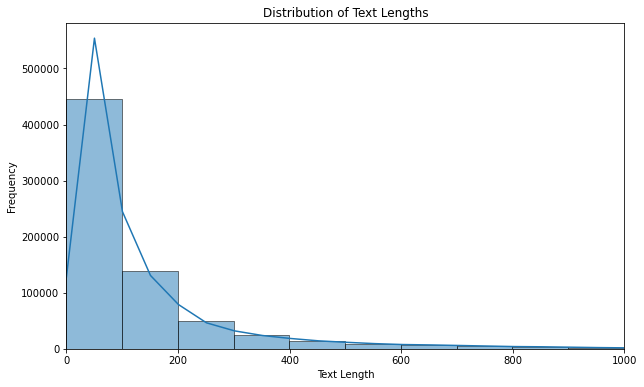

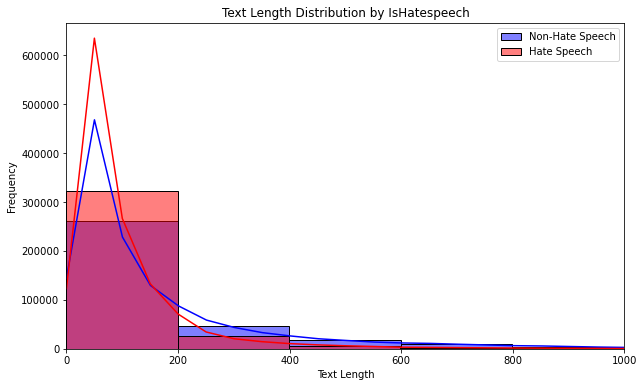

In [70]:
df['text_length'] = df['clean_text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=100, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.xlim(0, 1000)  
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df[df['IsHatespeech'] == 0]['text_length'], bins=50, color='blue', label='Non-Hate Speech', kde=True)
sns.histplot(df[df['IsHatespeech'] == 1]['text_length'], bins=50, color='red', label='Hate Speech', kde=True)
plt.title('Text Length Distribution by IsHatespeech')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(0, 1000) 
plt.show()


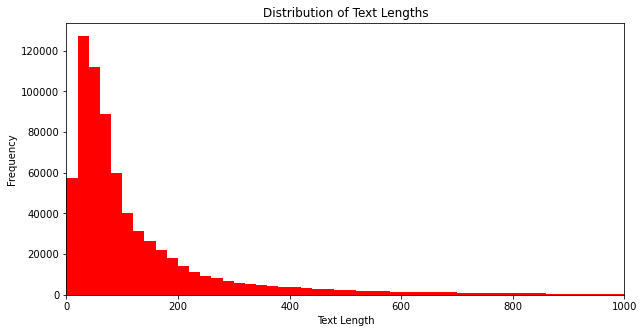

In [71]:

plt.figure(figsize=(10, 5))
df['text_length'].plot(kind='hist', bins=500, color='RED')
plt.title('Distribution of Text Lengths')
plt.xlim(0, 1000)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


### Word Frequency Analysis
#### Common Words: Identify and plot the most common words in the dataset.
#### Common Words by Class: Compare the most common words between hate speech and non-hate speech.

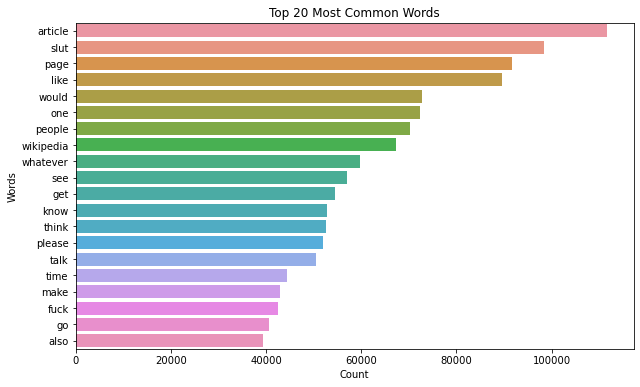

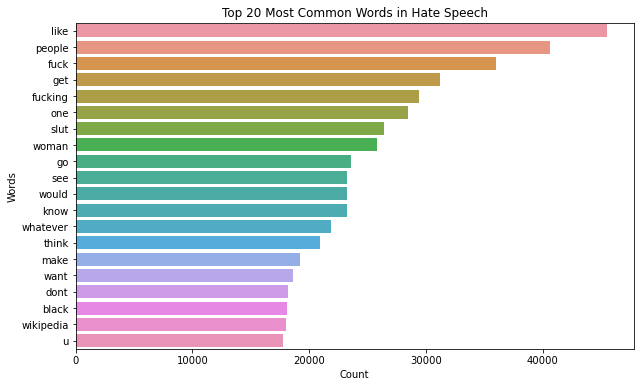

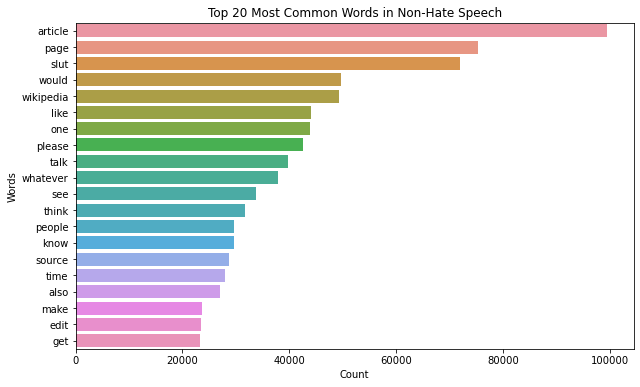

In [72]:

from collections import Counter

def word_frequencies(tokens):
    return Counter([word for token_list in tokens for word in token_list])


all_words = word_frequencies(df['tokens'])
common_words = all_words.most_common(20)
words, counts = zip(*common_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words))
plt.title('Top 20 Most Common Words')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()


hate_speech_words = word_frequencies(df[df['IsHatespeech'] == 1]['tokens'])
non_hate_speech_words = word_frequencies(df[df['IsHatespeech'] == 0]['tokens'])

common_hate_speech_words = hate_speech_words.most_common(20)
common_non_hate_speech_words = non_hate_speech_words.most_common(20)

hate_words, hate_counts = zip(*common_hate_speech_words)
non_hate_words, non_hate_counts = zip(*common_non_hate_speech_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(hate_counts), y=list(hate_words))
plt.title('Top 20 Most Common Words in Hate Speech')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=list(non_hate_counts), y=list(non_hate_words))
plt.title('Top 20 Most Common Words in Non-Hate Speech')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()


In [73]:
df.to_csv('Preprocessed_cleaned_Final_dataset.csv', index=False)
